[########################################] | 100% Completed | 485.55 ms


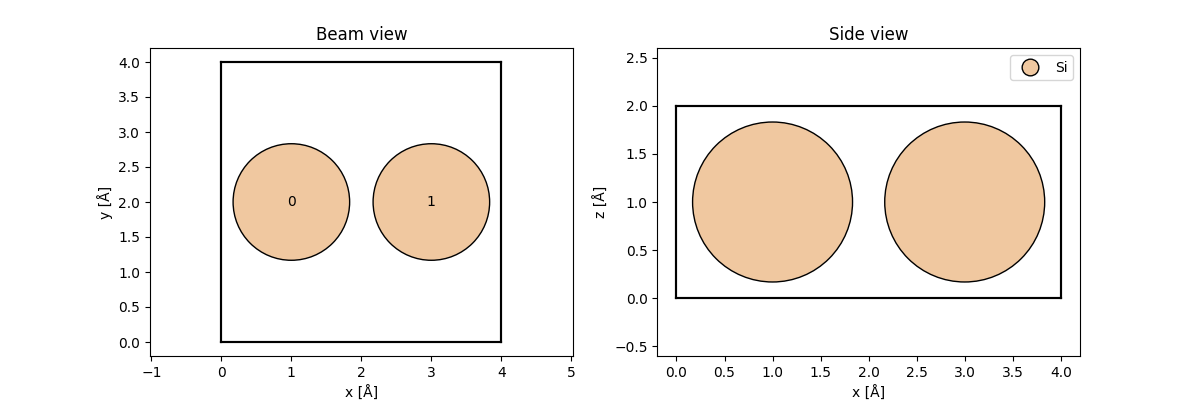

In [47]:
import ase
import numpy as np
from scipy.constants import c, e, m_e
import abtem
import matplotlib.pyplot as plt
from abtem.visualize import show_atoms

%config InlineBackend.rc = {"figure.dpi": 72, "figure.figsize": (6.0, 4.0)}
%matplotlib ipympl

atoms = ase.Atoms(
    "Si2", positions=[(1.0, 2.0, 1.0), (3.0, 2.0, 1.0)], cell=[4, 4, 2]
)

phi_0 = 100e3

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
abtem.show_atoms(atoms, ax=ax1, title="Beam view", numbering=True, merge=False)
abtem.show_atoms(atoms, ax=ax2, plane="xz", title="Side view", legend=True)

potential = abtem.Potential(atoms, sampling=0.04, projection="infinite")

potential_array = potential.build().project().compute()
pot_array = np.flip(potential_array.array, axis=0)


In [48]:
potential_array.array.shape

(2, 100, 100)

[                                        ] | 0% Completed | 2.26 ms

[########################################] | 100% Completed | 112.64 ms


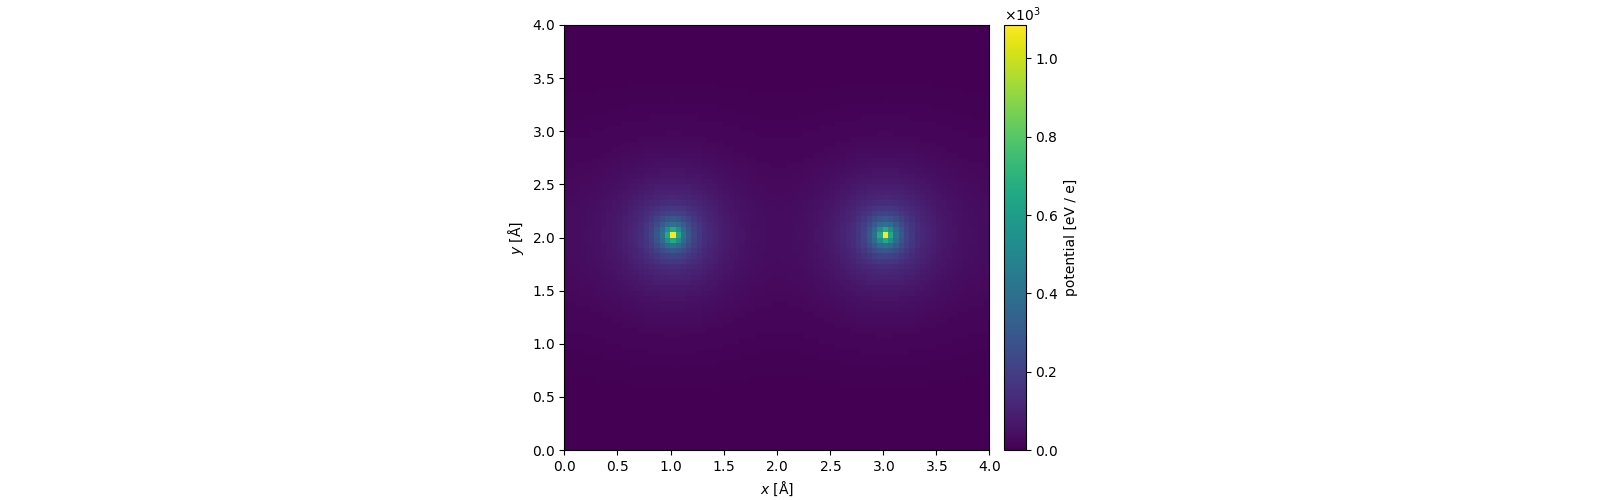

In [43]:
visualization = potential.show(
    project=True,
    explode=True,
    figsize=(16, 5),
    common_color_scale=True,
    cbar=True,
)

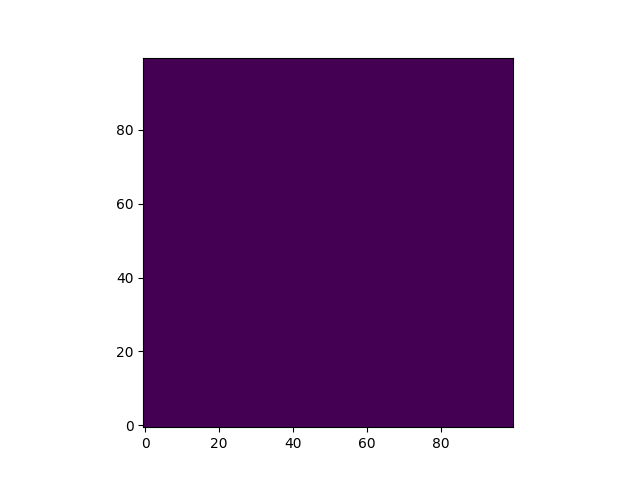

In [24]:
plt.figure()
plt.imshow(potential_array.array[0], origin='lower')